In [3]:
import cv2
import pytesseract
import numpy as np
import os
import matplotlib.pyplot as plt

def process_image(image_path):
    # Read the image
    original_image = cv2.imread(image_path)
    


# Example usage:
image_path = '81L5nXqWeLL.jpg'
print(image_path)

81L5nXqWeLL.jpg


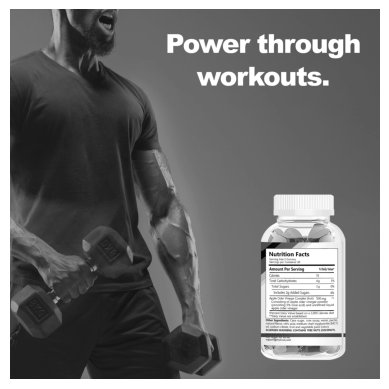

In [10]:
    # Convert to grayscale
image_path = '81L5nXqWeLL.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


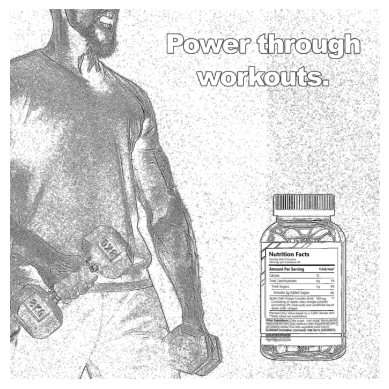

In [62]:
# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

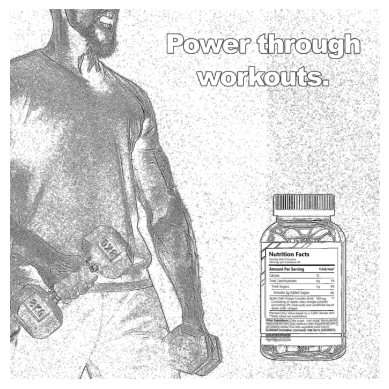

In [63]:
# Noise removal using Median Blur
denoised_image = cv2.medianBlur(binary_image, 3)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

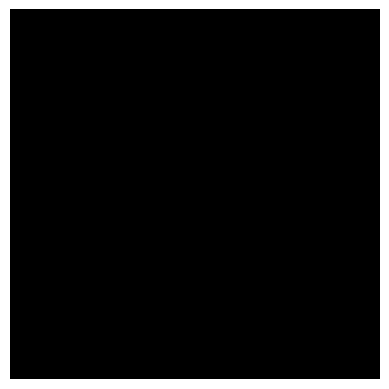

In [64]:
    # Dilation
kernel = np.ones((1,1), np.uint8)
dilated_image = cv2.dilate(denoised_image, kernel, iterations=1)
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.show()

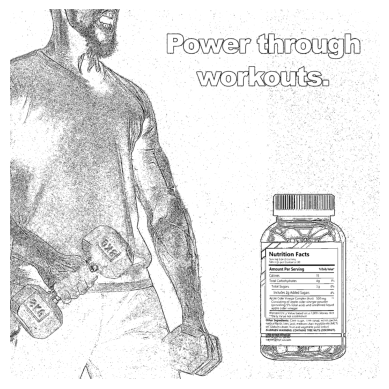

In [65]:
    # Erosion
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')
plt.show()

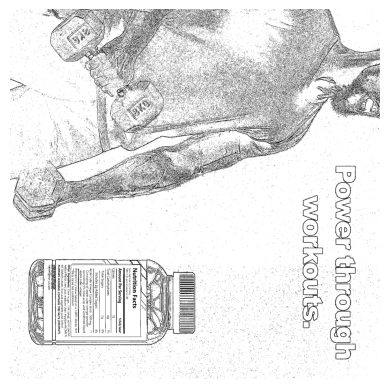

In [68]:
    # Skew Correction (rotation)
def correct_skew(image):
        coords = np.column_stack(np.where(image > 0))
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        return rotated
    
skew_corrected_image = correct_skew(eroded_image)
plt.imshow(skew_corrected_image, cmap='gray')
plt.axis('off')
plt.show()    


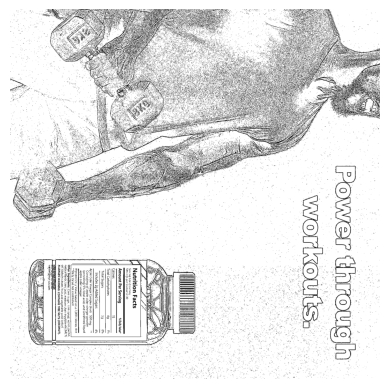

In [70]:
    # Resize image (increase size for better OCR performance)
resized_image = cv2.resize(skew_corrected_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()      


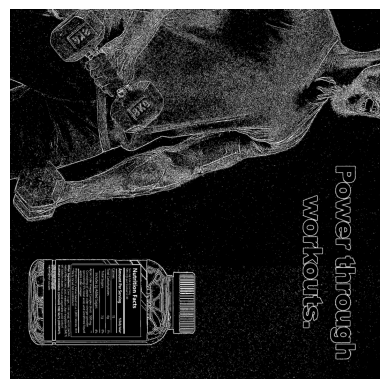

In [71]:
    # Invert colors for white text on black background (optional, based on image content)
inverted_image = cv2.bitwise_not(resized_image)
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')
plt.show()  


In [77]:
    # OCR Processing
text = pytesseract.image_to_string(inverted_image)
   


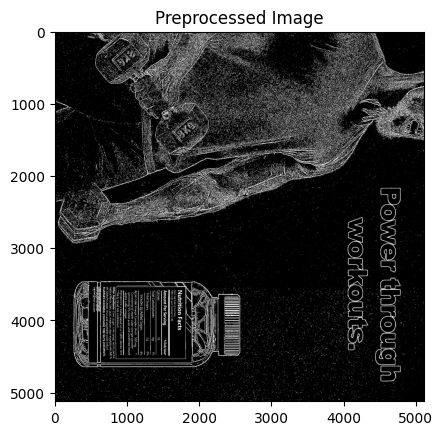

Text from image:
Power through
workouts.

Nutrition Facts

Serving Size 2 Gummy
Servings per Container 30

Amount Per Serving
Calories
tal Carbohydrates
‘al Sugars
Includes 2g Added Sugars

% Daily Value*

15

4g 1%

3g 0%
4%

Apple Cider Vinegar Complex (fruit) 500mg = **
Consisting of apple cider vinegar powder
(providing 5% total acid) and unrefined liquid
apple cider vinegar

iPercent Daily Value based on a

**Daily Value not established.

Other Ingredients: Cane sugar, com syrup, water, pectin,
natural flavor, citric acid, medium chain tryglyceride (MCT)

10 calories diet

oil, sodium citrate, fruit and vegetable juice (color).
ALLERGEN WARNING: CONTAINS TREE NUTS (COCONUT).





In [76]:
    # Display the preprocessed image and OCR result
plt.imshow(inverted_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()
print(f"Text from image:\n{text}\n")

In [60]:
# Example usage:
image_path = '81L5nXqWeLL.jpg'
process_image(image_path)

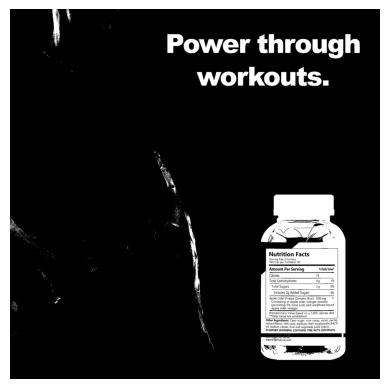

In [61]:
    # Apply Otsu's binarization
binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU+0)[1]
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

    # Noise removal with morphological transformations
kernel = np.ones((3, 3), np.uint8)